## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


# Display the data table for preview
study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
# Display Preview of table
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
#merging Data Set

merged_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
# total unique mice.

tot_mice = len(merged_df["Mouse ID"].unique())

tot_mice


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged_df.loc[merged_df.duplicated(),: ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

all_dup = merged_df.loc[merged_df["Mouse ID"] == "g989"]

all_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandata = merged_df.loc[merged_df["Mouse ID"]!="g989"]

cleandata



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.

tot_mice = len(merged_df["Mouse ID"].unique())

tot_mice


249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_data = cleandata[["Drug Regimen","Tumor Volume (mm3)"]]
tumor_data1 = tumor_data.groupby(["Drug Regimen"]).describe()
tumor_summary = tumor_data1

#drug_name_df = {"Drug Regimen" : ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
#              }

tumor_summary["Mean"] = tumor_data.groupby(["Drug Regimen"]).mean()
tumor_summary["Median"] = tumor_data.groupby(["Drug Regimen"]).median()
tumor_summary["Var"] = tumor_data.groupby(["Drug Regimen"]).var()
tumor_summary["Std"] = tumor_data.groupby(["Drug Regimen"]).std()
tumor_summary["Sem"] = tumor_data.groupby(["Drug Regimen"]).sem()

tumor_summary = tumor_summary[["Mean","Median","Var","Std","Sem"]]

tumor_summary


,Mean,Median,Var,Std,Sem
,,,,,
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


In [10]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

tumor_summary

,Mean,Median,Var,Std,Sem
,,,,,
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar and Pie Charts

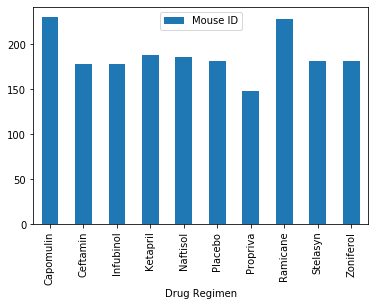

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Pandas's `DataFrame.plot()

df_pl_data = cleandata[["Mouse ID","Drug Regimen"]]
    
df_pl_data = df_pl_data.groupby(["Drug Regimen"]).count()
    
df_pl_data.plot(kind='bar')


<IPython.core.display.Javascript object>


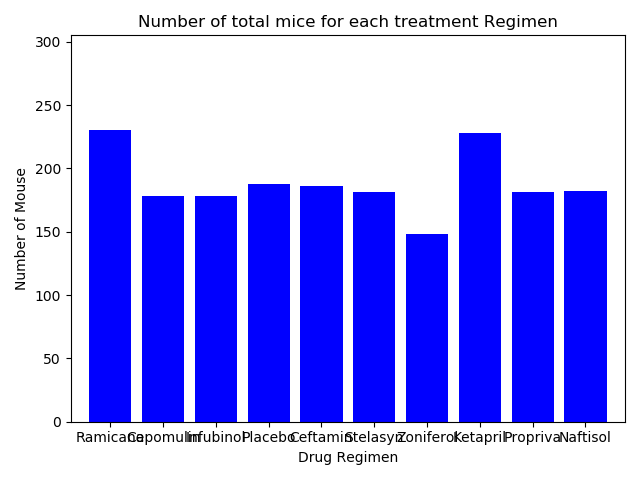

In [28]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Using Pyplot bar chart

%matplotlib notebook

mouse = df_pl_data['Mouse ID'].tolist()

drugs_list = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

x_axis = np.arange(len(mouse))

plt.bar(x_axis,mouse, color="b", align="center")

plt.title("Number of total mice for each treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs_list)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse)+75)
plt.tight_layout()

<IPython.core.display.Javascript object>


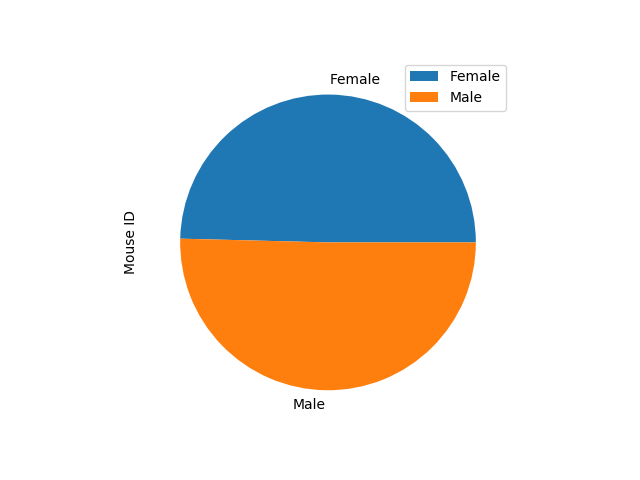

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c0da0d10>],
      dtype=object)

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

cleandata1 = cleandata.drop_duplicates(subset=["Drug Regimen", "Mouse ID"], keep='last')

mf_df = cleandata1[['Mouse ID','Sex']]

mfcompare_df = mf_df.groupby(['Sex']).count()

mfcompare_df.plot(kind='pie',subplots=True)




<IPython.core.display.Javascript object>


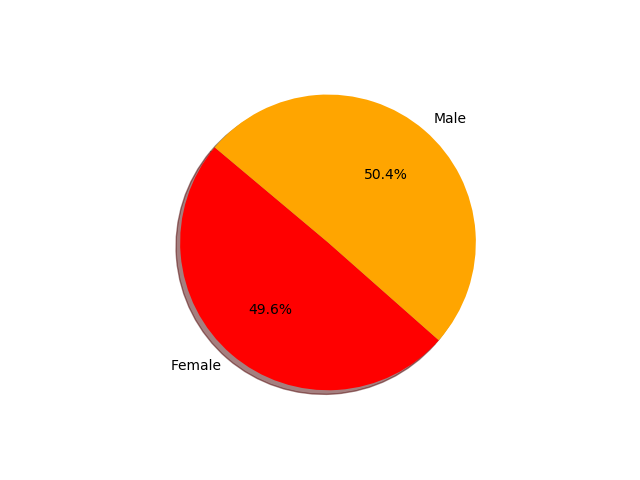

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
colors = ["red", "orange"]
explode = (0,0)
Sex = ['Female','Male']
mousecounts = mfcompare_df['Mouse ID'].tolist()

plt.pie(mousecounts, explode=explode, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Note : Merge isn't required since grouping and using idxmax() functions to retrive last max value.
four_data = cleandata.loc[(cleandata['Drug Regimen'] == 'Ramicane') | (cleandata['Drug Regimen'] == 'Capomulin') | (cleandata['Drug Regimen'] == 'Infubinol') | (cleandata['Drug Regimen'] == 'Ceftamin')]
#four_data = four_data[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
four_data_mx = four_data.groupby(['Mouse ID']).sum()
last_tip = four_data.loc[four_data.groupby(['Mouse ID'])['Timepoint'].idxmax()].reset_index(drop=True)


last_tip.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
5,a520,Ramicane,Male,13,21,45,38.810366,1
6,a577,Infubinol,Female,6,25,30,57.031862,2
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,a685,Infubinol,Male,8,30,45,66.083066,3
9,b128,Capomulin,Female,9,22,45,38.982878,2


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin
treat_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

Tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes


for i in treat_list: 
    getvol = last_tip.loc[last_tip['Drug Regimen'] == i,'Tumor Volume (mm3)']

    # add subset
    Tumor_vol.append(getvol)
    
# Determine outliers using upper and lower bounds

    quartiles = getvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Tumor Volume is: 48.72207785
The upper quartil

<IPython.core.display.Javascript object>


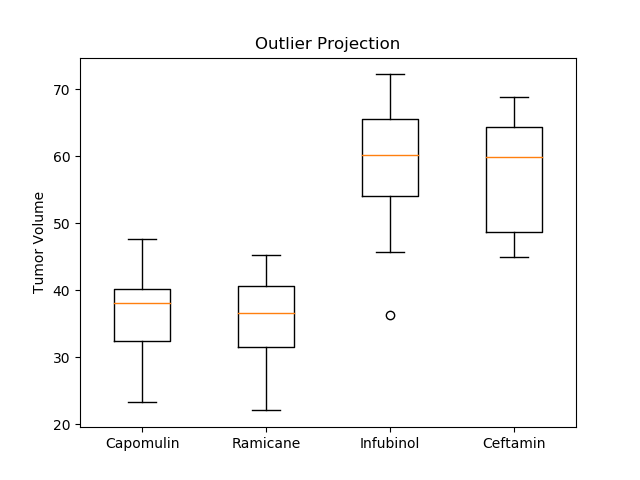

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook
plt.title('Outlier Projection')
#plt.boxplot(Tumor_vol, labels = treat_list, flierprops=green_diamond)
plt.boxplot(Tumor_vol, labels = treat_list)
plt.ylabel('Tumor Volume')
plt.show()





## Line and Scatter Plots

<IPython.core.display.Javascript object>


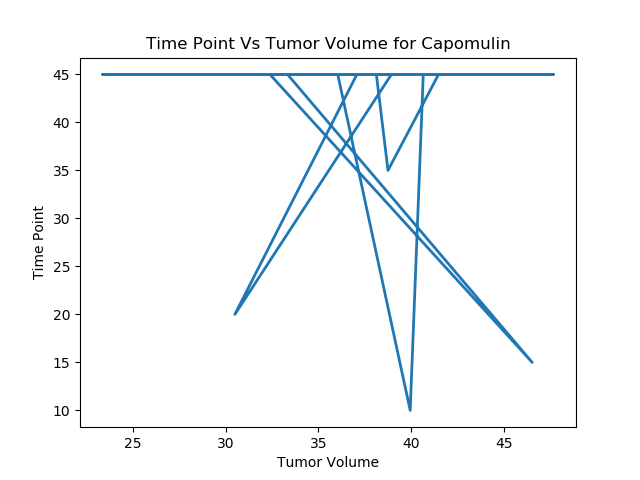

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
%matplotlib notebook
cap_df = last_tip.loc[last_tip["Drug Regimen"] == "Capomulin"]


plt.plot(cap_df['Tumor Volume (mm3)'],cap_df['Timepoint'], linewidth=2, markersize=12)
plt.title('Time Point Vs Tumor Volume for Capomulin')
plt.xlabel('Tumor Volume')
plt.ylabel('Time Point')
plt.show()

<IPython.core.display.Javascript object>


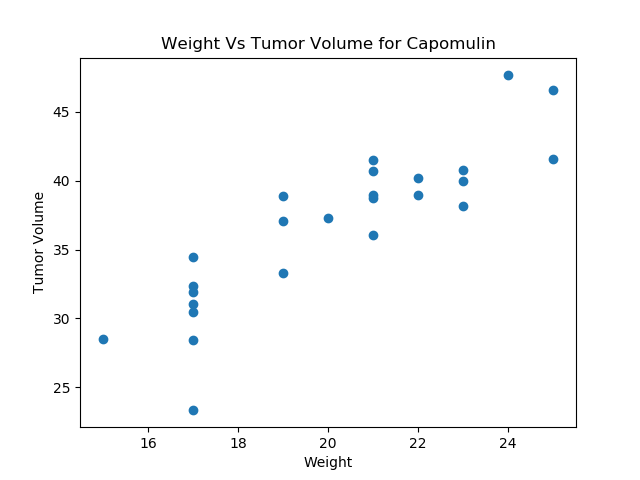

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
%matplotlib notebook
#plt.scatter(cap_df['Weight (g)'], cap_df['Tumor Volume (mm3)'], c='c', s='d')
plt.scatter(cap_df.iloc[:,4],cap_df.iloc[:,6])
plt.title('Weight Vs Tumor Volume for Capomulin')
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = cap_df.iloc[:,4]
tumor = cap_df.iloc[:,6]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88
